In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

In [7]:
def resize_image(image, size=(1000, 800)):
    # Obtener las dimensiones de la imagen
    height, width = image.shape[:2]
    # Si la imagen es más grande que el tamaño objetivo, usar cv2.INTER_AREA
    if height > size[0] or width > size[1]:
        interpolation = cv2.INTER_AREA
    # Si la imagen es más pequeña que el tamaño objetivo, usar cv2.INTER_CUBIC
    else:
        interpolation = cv2.INTER_CUBIC

    # Redimensionar la imagen
    resized_image = cv2.resize(image, size, interpolation=interpolation)
    return resized_image

ruta_carpeta = "persona"
carpeta_destino = f'resize/{ruta_carpeta}1000x800'
imagenes = []

for archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, archivo)
    if os.path.isfile(ruta_archivo) and archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
        imagenes.append(ruta_archivo)

print(len(imagenes))

for i,ruta_imagen in enumerate(imagenes):
    imagen = cv2.imread(ruta_imagen)
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    imagen_resized = resize_image(imagen_gray)
    nombre_archivo_destino = ruta_carpeta + 'Resize' + str(i) + '.jpg'
    ruta_archivo_destino = os.path.join(carpeta_destino, nombre_archivo_destino)
    plt.imsave(ruta_archivo_destino, imagen_resized, cmap='gray')
# cv2.imwrite('resize/imagen_resized.png', cv2.cvtColor(imagen_resized, cv2.COLOR_RGB2BGR))

50


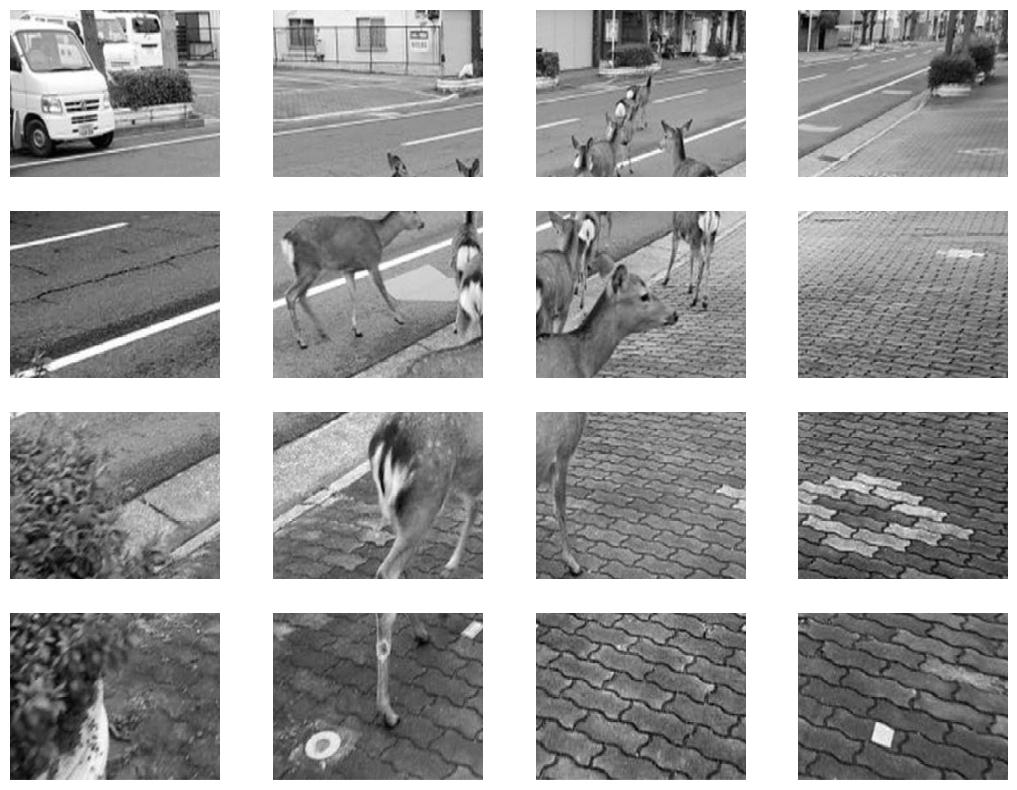

In [32]:
imagen = cv2.imread('resize/animales1000x800/animalesResize0.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

def parches(imagen, tamano_parche_alto = 200, tamano_parche_ancho = 250):
    alto, ancho = imagen.shape[:2]
    parches = []
    for y in range(0, alto, tamano_parche_alto):
        for x in range(0, ancho, tamano_parche_ancho):
            parche = imagen[y:y+tamano_parche_alto, x:x+tamano_parche_ancho]
            parches.append(parche)
    return parches

import matplotlib.pyplot as plt
partes = parches(imagen)

# Crear una nueva figura
plt.figure(figsize=(13, 10))

# Definir el número de filas y columnas
num_cols = 4
num_rows = 4

# Mostrar cada parche en un subplot
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(partes[i], cmap='gray')
    plt.axis('off')

plt.show()

In [35]:
def parches(imagen, tamano_parche_alto = 200, tamano_parche_ancho = 250):
    alto, ancho = imagen.shape[:2]
    parches = []
    for y in range(0, alto, tamano_parche_alto):
        for x in range(0, ancho, tamano_parche_ancho):
            parche = imagen[y:y+tamano_parche_alto, x:x+tamano_parche_ancho]
            parches.append(parche)
    return parches

ruta_carpeta = "resize/ciudad1000x800"
carpeta_destino = f'parche/ciudad'
imagenes = []

for archivo in os.listdir(ruta_carpeta):
    ruta_archivo = os.path.join(ruta_carpeta, archivo)
    if os.path.isfile(ruta_archivo) and archivo.lower().endswith(('.jpg', '.jpeg', '.png')):
        imagenes.append(ruta_archivo)
        
print(len(imagenes))

for i, ruta_imagen in enumerate(imagenes):
    imagen = cv2.imread(ruta_imagen)
    imagen_gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    parches_imagen = parches(imagen_gray)
    
    for j, parche in enumerate(parches_imagen):
        nombre_archivo_destino = 'ciudadParche' + str(i) + '_' + str(j) + '.jpg'
        ruta_archivo_destino = os.path.join(carpeta_destino, nombre_archivo_destino)
        
        plt.imsave(ruta_archivo_destino, parche, cmap='gray')

100


In [4]:
# Crear el objeto ORB
orb = cv2.ORB_create(nfeatures=15)

# Asumiendo que parches[15] es el parche de la imagen que quieres procesar
parche = parches[5]

# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

# Detectar y calcular las características ORB
keypoints, descriptors = orb.detectAndCompute(parche_gray, None)
descriptors = descriptors.flatten()
print('Número de keypoints:', len(keypoints))
print('Tamaño de los descriptores:', descriptors.shape)
# Mostrar el parche con los keypoints dibujados

Número de keypoints: 14
Tamaño de los descriptores: (448,)


In [5]:
# Asumiendo que parches[5] es el parche de la imagen que quieres procesar
parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

# Detectar y calcular las características SIFT
# Applying SIFT detector
sift = cv2.SIFT_create()
kp = sift.detect(parche_gray, None, )

print('Número de keypoints:', len(kp))


Número de keypoints: 642


In [6]:
# Asumiendo que parches[5] es el parche de la imagen que quieres procesar
parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

# Specify the parameters for our HOG descriptor
win_size = parche_gray.shape
cell_size = (16, 16)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 4
# Set the parameters of the HOG descriptor using the variables defined above
hog = cv2.HOGDescriptor(win_size, block_size, block_stride, cell_size, num_bins)

# Compute the HOG Descriptor for the gray scale image
hog_descriptor = hog.compute(parche_gray)

print ('HOG Descriptor:', hog_descriptor)
print ('HOG Descriptor has shape:', hog_descriptor.shape)

HOG Descriptor: [0.49875313 0.49875313 0.49875313 ... 0.49875313 0.49875313 0.49875313]
HOG Descriptor has shape: (2304,)


In [8]:
import mahotas

parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

# radius
radius = 15
 
zernike = mahotas.features.zernike_moments(parche_gray, radius)
  
print ('zernike Descriptor:', zernike)
print ('zernike Descriptor has shape:', zernike.shape)

zernike Descriptor: [0.31830989 0.03558365 0.03519846 0.05409247 0.03219744 0.03724511
 0.01625977 0.04320852 0.05010437 0.02657593 0.02436155 0.04601129
 0.00059278 0.00897592 0.02486608 0.01815207 0.01866777 0.02926964
 0.0104201  0.06256739 0.0111819  0.00359324 0.02872457 0.02229581
 0.02342261]
zernike Descriptor has shape: (25,)


In [ ]:
from skimage import feature
parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

num_points = 24
radius=8
lbp = feature.local_binary_pattern(parche_gray, num_points, radius, method="uniform")
lbp = lbp.flatten()
print ('LBP Descriptor:', lbp)
print ('LBP Descriptor has shape:', len(lbp))

LBP Descriptor: [25.  2.  1. ... 25. 25.  0.]
LBP Descriptor has shape: 40000


win_size = parche_gray.shape
cell_size = (16, 16)
block_size = (16, 16)
block_stride = (8, 8)
num_bins = 4

In [ ]:
from skimage.feature import hog

parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

fd, hog_image = hog(
    parche,
    orientations=6,
    pixels_per_cell=(32, 32),
    cells_per_block=(1, 1),
    visualize=True,
    channel_axis=-1,
)

print ('HOG Descriptor:', fd)
print ('HOG Descriptor has shape:', fd.shape)

HOG Descriptor: [0.45533736 0.33599288 0.45533736 0.45533736 0.2403754  0.45533736
 0.48771236 0.14802096 0.48771236 0.48771236 0.16320659 0.48771236
 0.44828605 0.33498413 0.44828605 0.44828605 0.28973108 0.44828605
 0.46337414 0.27338858 0.46337414 0.46337414 0.25767482 0.46337414
 0.43036652 0.34120704 0.43036652 0.43036652 0.37777822 0.43036652
 0.45905812 0.33507651 0.45905812 0.45905812 0.2116277  0.45905812
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829 0.40824829
 0.40824829 0.40824829 0.40824829 0.40824829 0

In [ ]:
from scipy import ndimage as ndi

def gabor_filter(image, frequency, theta):
    """
    Apply a Gabor filter to an image.

    Parameters:
    - image: The input image to which the Gabor filter will be applied.
    - frequency: The frequency of the sinusoidal factor in the Gabor filter kernel.
    - theta: The orientation of the normal to the parallel stripes of a Gabor function.
    """
    # Create the Gabor filter kernel
    gabor_kernel = cv2.getGaborKernel((21, 21), 8.0, theta, frequency, 0.5, 0, ktype=cv2.CV_32F)
    
    # Normalize the kernel to have sum 0
    gabor_kernel /= 1.5*gabor_kernel.sum()

    # Apply the Gabor filter to the image
    filtered_image = ndi.convolve(image, gabor_kernel, mode='wrap')
    
    return filtered_image

filtered_image = gabor_filter(parche_gray, frequency=0.6, theta=np.pi/4)

flattened_image = filtered_image.flatten()
print(flattened_image.shape)
print(flattened_image)

(40000,)
[119  61  59 ...  44  83 116]


In [ ]:
from skimage.feature import match_descriptors, plot_matches, SIFT

descriptor_extractor = SIFT(upsampling=2, n_octaves=32, n_scales=1, sigma_min=1.6, sigma_in=0.5, c_dog=0.013333333333333334, c_edge=5, n_bins=36, lambda_ori=1.5, c_max=0.8, lambda_descr=6, n_hist=4, n_ori=8)

parche = parches[5]
# Convertir el parche a escala de grises
parche_gray = cv2.cvtColor(parche, cv2.COLOR_RGB2GRAY)

descriptor_extractor.detect_and_extract(parche_gray)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors
descriptor = descriptors1.flatten()

print('Tamaño de los descriptores:', descriptor.shape)

Tamaño de los descriptores: (26112,)
